## Start

In [1]:
import os

base_dir = '/home/irium/htdocs/widiarrohman1234.github.io/Artificial_Intelligence/folder_dataset/animal/animal_dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
folders=os.listdir(train_dir)

## Image Data Generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    )
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 50),
    batch_size=1
    )
validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 50),
    batch_size=1
    )

Found 25 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


## Deep Learning Model

![Deep Learning Model](../image/deep_learning_model.png)

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(100, 50, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='sigmoid')(x)
output = layers.Dense(5, activation='softmax')(x)
model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])

I0000 00:00:1733370693.974284   14958 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1273 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


## Fit Generator

In [4]:
history = model.fit(
    train_generator,
    # steps_per_epoch=20,
    epochs=250,
    validation_data=validation_generator,
    # validation_steps=10,
    # verbose=2
    )

Epoch 1/250


/home/irium/miniconda3/envs/widi1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733370695.222753   15002 service.cc:148] XLA service 0x75cf380062a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733370695.222775   15002 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-12-05 10:51:35.239335: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733370695.287833   15002 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-05 10:51:35.842684: W external

 4/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5208 - loss: 0.1275

I0000 00:00:1733370696.318845   15002 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.2746 - loss: 0.1600 - val_acc: 0.2000 - val_loss: 0.1764
Epoch 2/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1963 - loss: 0.1656 - val_acc: 0.2000 - val_loss: 0.1738
Epoch 3/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1336 - loss: 0.1692 - val_acc: 0.2000 - val_loss: 0.1720
Epoch 4/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2891 - loss: 0.1629 - val_acc: 0.2000 - val_loss: 0.1705
Epoch 5/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2831 - loss: 0.1590 - val_acc: 0.2000 - val_loss: 0.1694
Epoch 6/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.1337 - loss: 0.1756 - val_acc: 0.3000 - val_loss: 0.1684
Epoch 7/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.3054 - loss: 0.1682 - val_acc: 0.4000 - val_loss: 0.1674
Epoch 8/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.4204 - loss: 0.1647 - val_acc: 0.5000 - val_loss: 0.1664
Epoch 9/250
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2087 - loss: 0.

## Accuracy & Loss

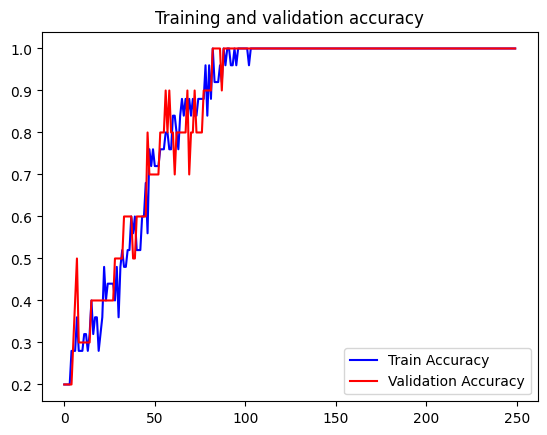

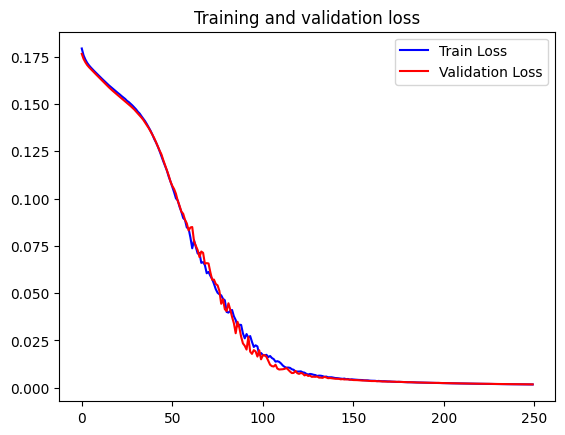

In [5]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

## Testing Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Nilai Output Units:
 [[0.9493175  0.00959371 0.01038114 0.00264296 0.02806474]]


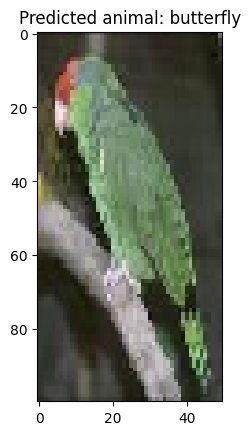

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.89874893 0.03085587 0.04182754 0.00183369 0.0267339 ]]


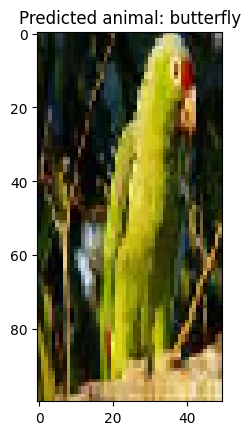

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.00609337 0.00552448 0.00161264 0.96700615 0.01976334]]


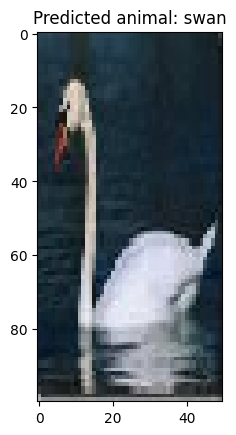

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Nilai Output Units:
 [[0.0126359  0.9499822  0.00818615 0.01489895 0.01429669]]


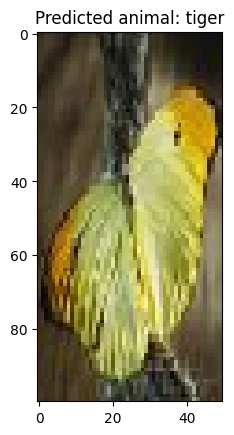

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.01452664 0.00267513 0.96576315 0.00323123 0.01380396]]


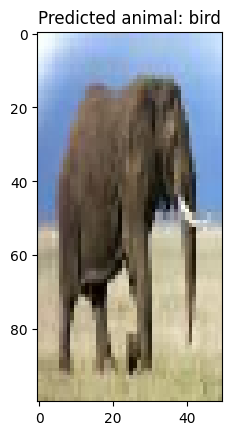

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Nilai Output Units:
 [[0.01964029 0.0020088  0.96175146 0.00433792 0.01226158]]


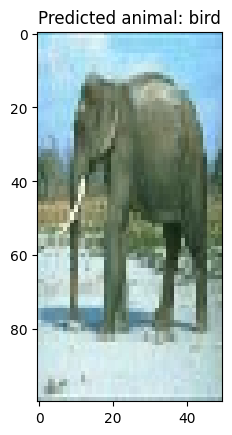

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nilai Output Units:
 [[0.00124887 0.01549655 0.00124137 0.9720106  0.01000263]]


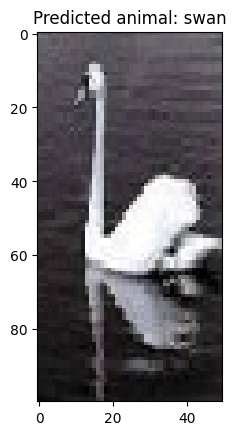

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Nilai Output Units:
 [[0.03639406 0.01479553 0.00875145 0.00808591 0.9319731 ]]


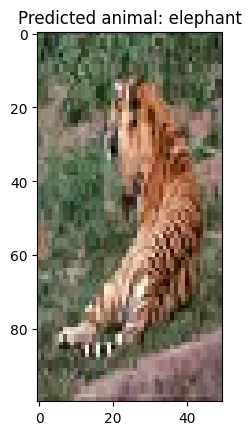

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nilai Output Units:
 [[0.01843983 0.94931555 0.00546777 0.01553919 0.01123761]]


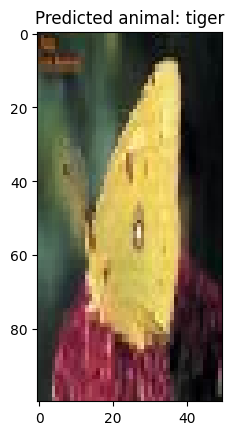

############################################
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Nilai Output Units:
 [[0.01170099 0.01100673 0.00804098 0.01489272 0.95435864]]


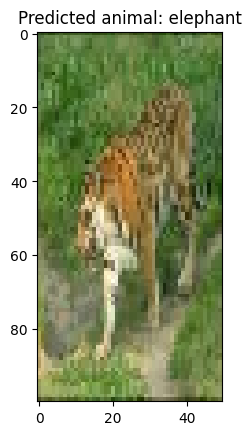

############################################


In [6]:
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from tensorflow.keras.preprocessing import image

for filename in os.listdir(test_dir):
    # Make sure the file is an image (check for .jpg, .jpeg, .png, etc.)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img = load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(100, 50))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        print("Nilai Output Units:\n", preds)
        index_preds = np.argmax(preds)
        img_print = image.load_img(f"{test_dir}//{filename}", color_mode="rgb",target_size=(100, 50))
        plt.imshow(img_print)
        plt.title(f'Predicted animal: {folders[index_preds]}')
        plt.show()
        print("############################################")